## Importing the required packages

In [83]:
import numpy as np
import pandas as pd
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='nqieWZyH0mWf7E2JdXP9qH5IVetQi1eIAfTklPxE4Xvc',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelaypredictor-donotdelete-pr-utjmv8tbhtecke'
object_key = 'flightdata.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

## Performing Univariate Analysis

### Using Pie Chart

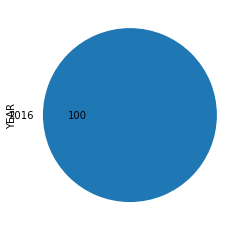

In [85]:
df['YEAR'].value_counts().plot(kind='pie', autopct='%.0f')
plt.show()

## Performing Bivariate Analysis

### Using scatterplot

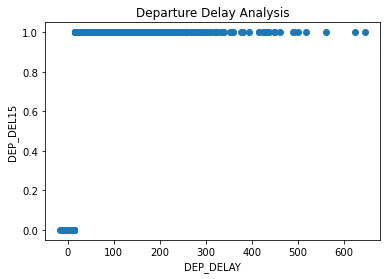

In [86]:
plt.scatter(df.DEP_DELAY, df.DEP_DEL15)
plt.title('Departure Delay Analysis')
plt.xlabel('DEP_DELAY')
plt.ylabel('DEP_DEL15')
plt.show()

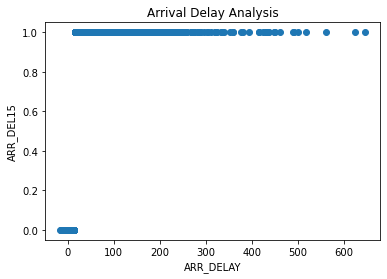

In [87]:
plt.scatter(df.DEP_DELAY, df.DEP_DEL15)
plt.title('Arrival Delay Analysis')
plt.xlabel('ARR_DELAY')
plt.ylabel('ARR_DEL15')
plt.show()

### Using lineplots

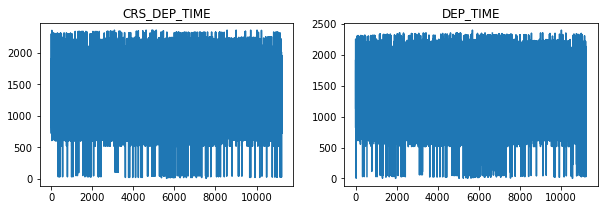

In [88]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('CRS_DEP_TIME')
plt.plot(df.CRS_DEP_TIME)
plt.subplot(1, 2, 2)
plt.title('DEP_TIME')
plt.plot(df.DEP_TIME)
plt.show()

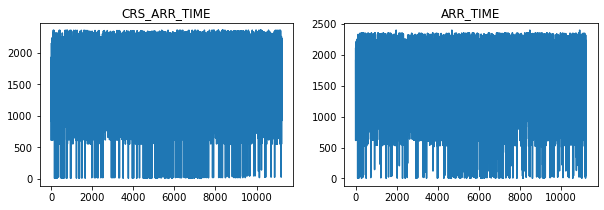

In [89]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('CRS_ARR_TIME')
plt.plot(df.CRS_ARR_TIME)
plt.subplot(1, 2, 2)
plt.title('ARR_TIME')
plt.plot(df.ARR_TIME)
plt.show()

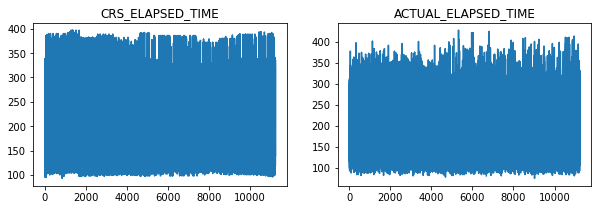

In [90]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('CRS_ELAPSED_TIME')
plt.plot(df.CRS_ELAPSED_TIME)
plt.subplot(1, 2, 2)
plt.title('ACTUAL_ELAPSED_TIME')
plt.plot(df.ACTUAL_ELAPSED_TIME)
plt.show()

## Performing Multivariate Analysis

### Using pairplot

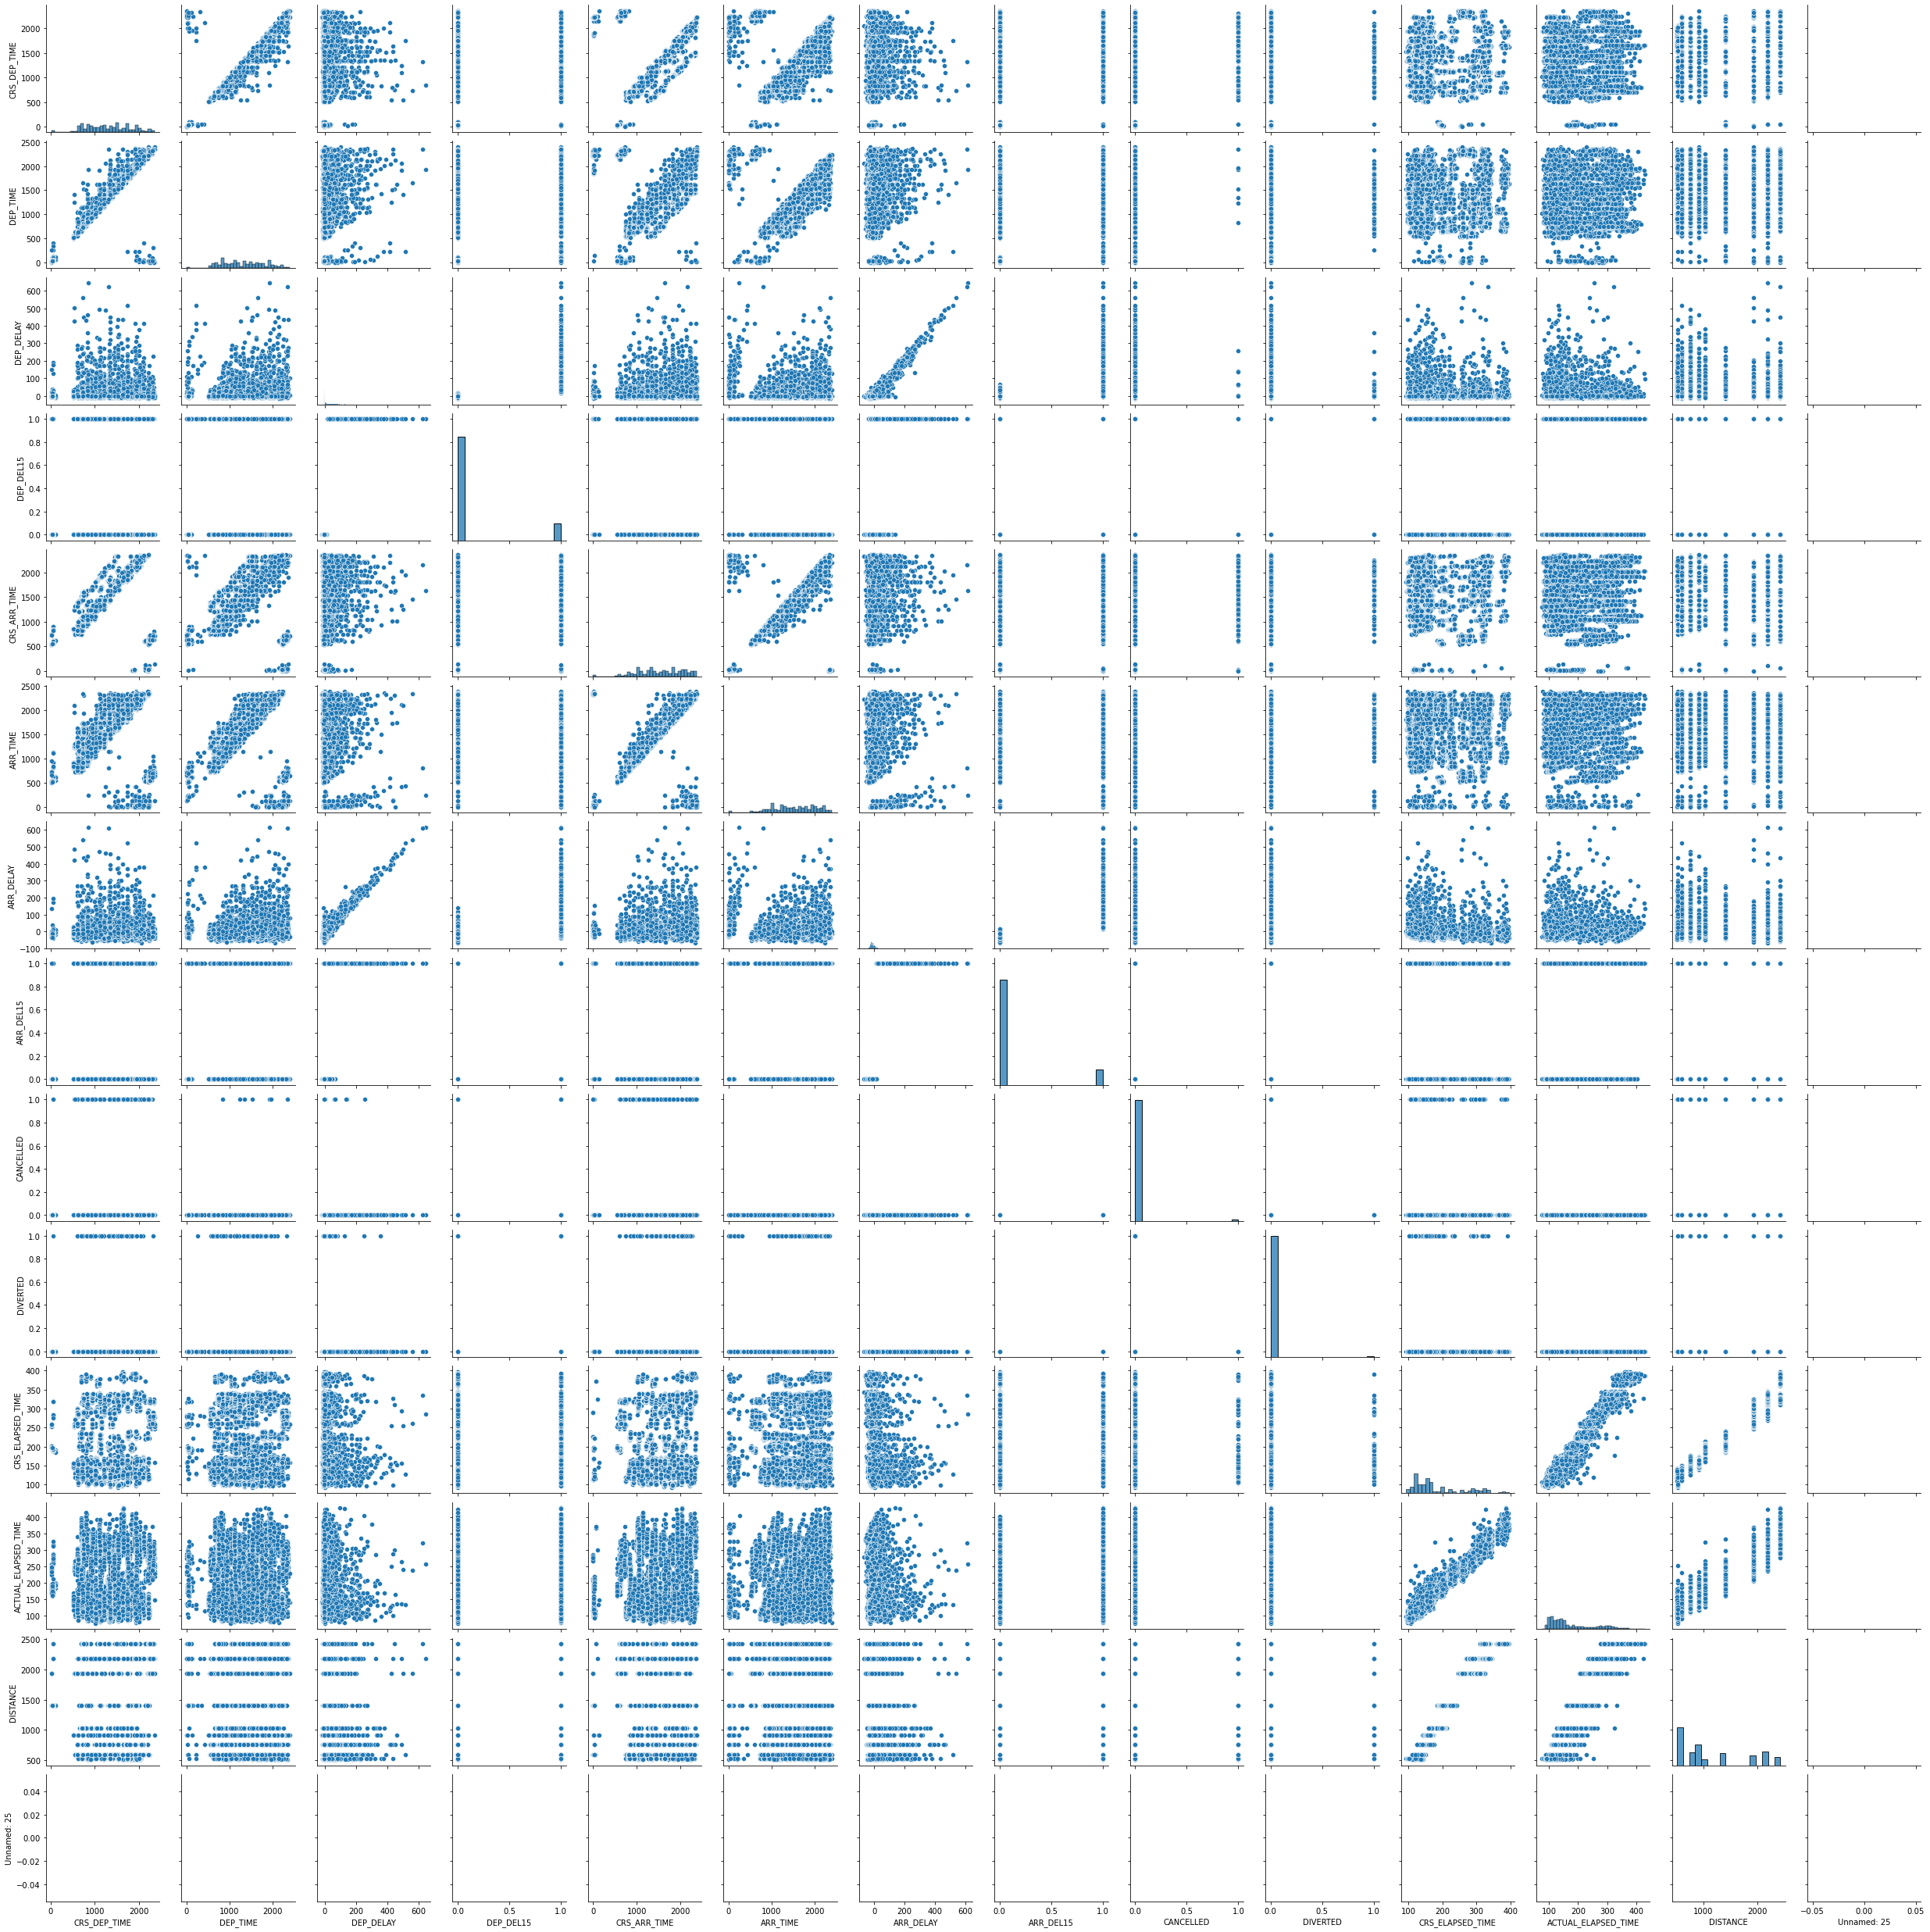

In [91]:
sb.pairplot(df.iloc[:, 12:])
plt.show()

### Using heatmap

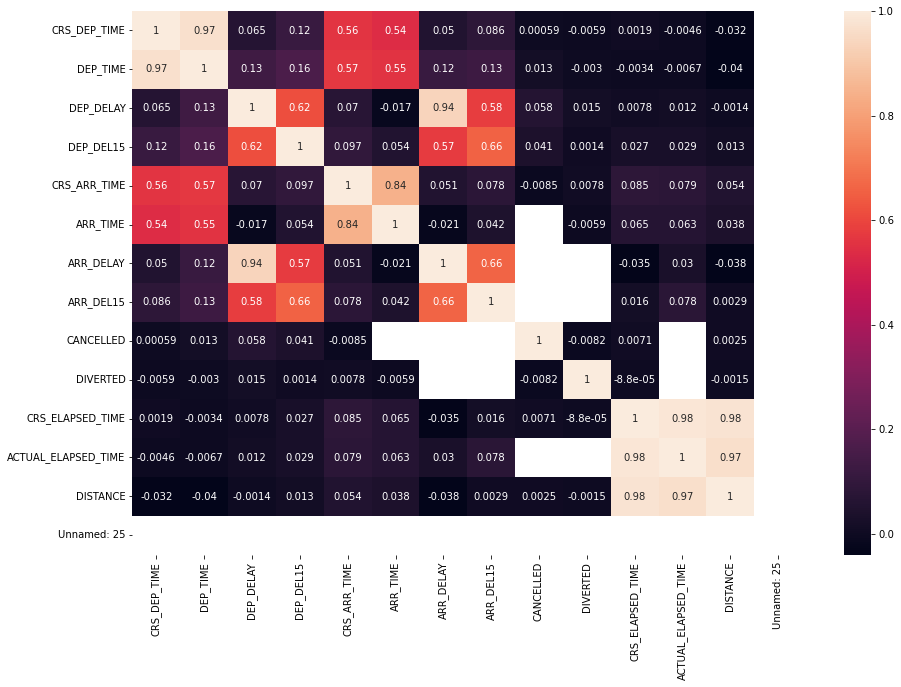

In [92]:
fig, ax = plt.subplots(figsize=(15, 10))
sb.heatmap(df.iloc[:, 12:].corr(), annot=True, ax=ax)
plt.show()

## Performing Descriptive Analysis

In [93]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


## Dropping unnecessary columns

In [94]:
df = df[['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_DEL15']]
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
0,1399,1,1,5,ATL,SEA,0.0,2143,0.0
1,1476,1,1,5,DTW,MSP,0.0,1435,0.0
2,1597,1,1,5,ATL,SEA,0.0,1215,0.0
3,1768,1,1,5,SEA,MSP,0.0,1335,0.0
4,1823,1,1,5,SEA,DTW,0.0,607,0.0


## Handling Missing Values

### Checking for null values

In [95]:
df.isnull().any()

FL_NUM          False
MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
ORIGIN          False
DEST            False
DEP_DEL15        True
CRS_ARR_TIME    False
ARR_DEL15        True
dtype: bool

### Replacing null values

In [96]:
df.fillna(df['DEP_DEL15'].mode()[0], inplace=True)
df.fillna(df['ARR_DEL15'].mode()[0], inplace=True)

### Checking if the replacement is made

In [97]:
df.isnull().any()

FL_NUM          False
MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
ORIGIN          False
DEST            False
DEP_DEL15       False
CRS_ARR_TIME    False
ARR_DEL15       False
dtype: bool

## Handling Outliers

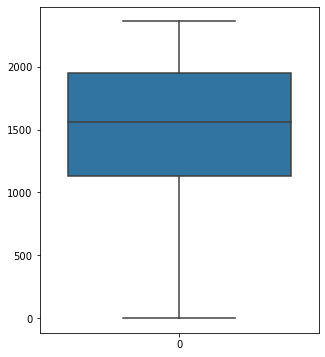

In [98]:
fig, ax = plt.subplots(figsize=(5, 6))
sb.boxplot(data=df['CRS_ARR_TIME'])
plt.show()

<b> There are no outliers </b>

## Encoding

### One Hot Encoding

In [99]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1399,1,1,5,0.0,2143,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,0.0,1435,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,0.0,1215,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,0.0,1335,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,0.0,607,0.0,0,0,0,0,1,0,1,0,0,0


In [100]:
df.columns

Index(['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DEL15',
       'CRS_ARR_TIME', 'ARR_DEL15', 'ORIGIN_ATL', 'ORIGIN_DTW', 'ORIGIN_JFK',
       'ORIGIN_MSP', 'ORIGIN_SEA', 'DEST_ATL', 'DEST_DTW', 'DEST_JFK',
       'DEST_MSP', 'DEST_SEA'],
      dtype='object')

## Splitting dataset into Independent and Dependent Variables

In [101]:
X = df.drop(columns=['ARR_DEL15'])
Y = df[['ARR_DEL15']]

## Converting the Independent and Dependent Variables to 1D Arrays

In [102]:
X = X.values
Y = Y.values

## Splitting dataset into Train and Test datasets

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [104]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8984, 16), (2247, 16), (8984, 1), (2247, 1))

## Building the Machine Learning Models

### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=800)
log_reg.fit(X_train, Y_train.ravel())

LogisticRegression(max_iter=800)

### Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train.ravel())

DecisionTreeClassifier()

### KNN Classifier

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.ravel())

KNeighborsClassifier()

### Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15, max_depth=3)
rf.fit(X_train, Y_train.ravel())

RandomForestClassifier(max_depth=3, n_estimators=15)

## Testing the Models

### Logistic Regression

In [109]:
Y_pred_log_train = log_reg.predict(X_train)
Y_pred_log_test = log_reg.predict(X_test)

In [110]:
pd.DataFrame(Y_pred_log_train).value_counts()

0.0    7778
1.0    1206
dtype: int64

In [111]:
pd.DataFrame(Y_pred_log_test).value_counts()

0.0    1931
1.0     316
dtype: int64

### Decision Tree Classifier

In [112]:
Y_pred_clf_train = clf.predict(X_train)
Y_pred_clf_test = clf.predict(X_test)

In [113]:
pd.DataFrame(Y_pred_clf_train).value_counts()

0.0    7895
1.0    1089
dtype: int64

In [114]:
pd.DataFrame(Y_pred_clf_test).value_counts()

0.0    1971
1.0     276
dtype: int64

### KNN Classifier

In [115]:
Y_pred_knn_train = knn.predict(X_train)
Y_pred_knn_test = knn.predict(X_test)

In [116]:
pd.DataFrame(Y_pred_knn_train).value_counts()

0.0    8707
1.0     277
dtype: int64

In [117]:
pd.DataFrame(Y_pred_knn_test).value_counts()

0.0    2182
1.0      65
dtype: int64

### Random Forest Classifier

In [118]:
Y_pred_rf_train = rf.predict(X_train)
Y_pred_rf_test = rf.predict(X_test)

In [119]:
pd.DataFrame(Y_pred_rf_train).value_counts()

0.0    8975
1.0       9
dtype: int64

In [120]:
pd.DataFrame(Y_pred_rf_test).value_counts()

0.0    2247
dtype: int64

## Evaluating the ML Models using Metrics

### Logistic Regression

##### Classification Report

In [121]:
print(classification_report(Y_test, Y_pred_log_test))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1961
         1.0       0.68      0.75      0.71       286

    accuracy                           0.92      2247
   macro avg       0.82      0.85      0.83      2247
weighted avg       0.93      0.92      0.92      2247



##### Accuracy, Precision, Recall, F1 Score

In [122]:
acc_log = accuracy_score(Y_test, Y_pred_log_test)
prec_log, rec_log, f1_log, sup_log = precision_recall_fscore_support(Y_test, Y_pred_log_test)
print('Accuracy Score =', acc_log)
print('Precision =', prec_log[0])
print('Recall =', rec_log[0])
print('F1 Score =', f1_log[0])

Accuracy Score = 0.9225634178905207
Precision = 0.9627136198860694
Recall = 0.9479857215706272
F1 Score = 0.9552929085303186


##### Checking for Overfitting and Underfitting

In [123]:
log_train_acc = accuracy_score(Y_train, Y_pred_log_train)
log_test_acc = accuracy_score(Y_test, Y_pred_log_test)
print('Training Accuracy =', log_train_acc)
print('Testing Accuracy =', log_test_acc)

Training Accuracy = 0.9199688334817453
Testing Accuracy = 0.9225634178905207


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Logistic Regression model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [124]:
pd.crosstab(Y_test.ravel(), Y_pred_log_test)

col_0,0.0,1.0
row_0,,
0.0,1859,102
1.0,72,214


### Decision Tree Classifier

##### Classification Report

In [125]:
print(classification_report(Y_test, Y_pred_clf_test))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1961
         1.0       0.51      0.50      0.51       286

    accuracy                           0.88      2247
   macro avg       0.72      0.71      0.72      2247
weighted avg       0.87      0.88      0.88      2247



##### Accuracy, Precision, Recall, F1 Score

In [126]:
acc_clf = accuracy_score(Y_test, Y_pred_clf_test)
prec_clf, rec_clf, f1_clf, sup_clf = precision_recall_fscore_support(Y_test, Y_pred_clf_test)
print('Accuracy Score =', acc_clf)
print('Precision =', prec_clf[0])
print('Recall =', rec_clf[0])
print('F1 Score =', f1_clf[0])

Accuracy Score = 0.8762794837561193
Precision = 0.9269406392694064
Recall = 0.9316675165731769
F1 Score = 0.9292980671414038


##### Checking for Overfitting and Underfitting

In [127]:
clf_train_acc = accuracy_score(Y_train, Y_pred_clf_train)
clf_test_acc = accuracy_score(Y_test, Y_pred_clf_test)
print('Training Accuracy =', clf_train_acc)
print('Testing Accuracy =', clf_test_acc)

Training Accuracy = 1.0
Testing Accuracy = 0.8762794837561193


<p><b>There is significant variation in the training and testing accuracy. The training accuracy is greater when compared to the testing accuracy. Therefore, the Decision Tree Classifier model is overfit.</b></p>

##### Confusion Matrix

In [128]:
pd.crosstab(Y_test.ravel(), Y_pred_clf_test)

col_0,0.0,1.0
row_0,,
0.0,1827,134
1.0,144,142


### KNN Classifier

##### Classification Report

In [129]:
print(classification_report(Y_test, Y_pred_knn_test))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92      1961
         1.0       0.29      0.07      0.11       286

    accuracy                           0.86      2247
   macro avg       0.58      0.52      0.52      2247
weighted avg       0.80      0.86      0.82      2247



##### Accuracy, Precision, Recall, F1 Score

In [130]:
acc_knn = accuracy_score(Y_test, Y_pred_knn_test)
prec_knn, rec_knn, f1_knn, sup_knn = precision_recall_fscore_support(Y_test, Y_pred_knn_test)
print('Accuracy Score =', acc_knn)
print('Precision =', prec_knn[0])
print('Recall =', rec_knn[0])
print('F1 Score =', f1_knn[0])

Accuracy Score = 0.8607031597685804
Precision = 0.8776351970669111
Recall = 0.9765425803161653
F1 Score = 0.9244508810041033


##### Checking for Overfitting and Underfitting

In [131]:
knn_train_acc = accuracy_score(Y_train, Y_pred_knn_train)
knn_test_acc = accuracy_score(Y_test, Y_pred_knn_test)
print('Training Accuracy =', knn_train_acc)
print('Testing Accuracy =', knn_test_acc)

Training Accuracy = 0.8878005342831701
Testing Accuracy = 0.8607031597685804


<p><b>There is no big variation in the training and testing accuracy. Therefore, the KNN Classifier model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [132]:
pd.crosstab(Y_test.ravel(), Y_pred_knn_test)

col_0,0.0,1.0
row_0,,
0.0,1915,46
1.0,267,19


### Random Forest Classifier

##### Classification Report

In [133]:
print(classification_report(Y_test, Y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1961
         1.0       0.00      0.00      0.00       286

    accuracy                           0.87      2247
   macro avg       0.44      0.50      0.47      2247
weighted avg       0.76      0.87      0.81      2247



/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Accuracy, Precision, Recall, F1 Score

In [134]:
acc_rf = accuracy_score(Y_test, Y_pred_rf_test)
prec_rf, rec_rf, f1_rf, sup_rf = precision_recall_fscore_support(Y_test, Y_pred_rf_test)
print('Accuracy Score =', acc_rf)
print('Precision =', prec_rf[0])
print('Recall =', rec_rf[0])
print('F1 Score =', f1_rf[0])

Accuracy Score = 0.872719181130396
Precision = 0.872719181130396
Recall = 1.0
F1 Score = 0.9320342205323193


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Checking for Overfitting and Underfitting

In [135]:
rf_train_acc = accuracy_score(Y_train, Y_pred_rf_train)
rf_test_acc = accuracy_score(Y_test, Y_pred_rf_test)
print('Training Accuracy =', rf_train_acc)
print('Testing Accuracy =', rf_test_acc)

Training Accuracy = 0.8797862867319679
Testing Accuracy = 0.872719181130396


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Random Forest Classifier model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [136]:
pd.crosstab(Y_test.ravel(), Y_pred_rf_test)

col_0,0.0
row_0,
0.0,1961
1.0,286


<h3 style="font-style:italic"> On comparing the four models built, based on the performance metrics it is clear that Logistic Regression Model gives the highest performance. Hence, that model is chosen for deployment </h3>

## Hyper Parameter Tuning

### Tuning the Hyper Parameters of Logistic Regression

In [137]:
parameters = { 'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'C':[100, 10, 1.0, 0.1, 0.01],
             'penalty':['l2']}

In [138]:
tuned_model = GridSearchCV(LogisticRegression(max_iter=800), param_grid=parameters, verbose=2)
tuned_model.fit(X_train, Y_train.ravel())

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.4s


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.4s


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.4s


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.2s


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=1

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.4s


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s


GridSearchCV(estimator=LogisticRegression(max_iter=800),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

### Testing the Tuned Model

In [139]:
Y_pred_tun_train = tuned_model.predict(X_train)
Y_pred_tun_test = tuned_model.predict(X_test)

In [140]:
pd.DataFrame(Y_pred_tun_train).value_counts()

0.0    7813
1.0    1171
dtype: int64

In [141]:
pd.DataFrame(Y_pred_tun_test).value_counts()

0.0    1938
1.0     309
dtype: int64

### Evaluating the Tuned Model using Metrics

##### Classification Report

In [142]:
print(classification_report(Y_test, Y_pred_tun_test))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1961
         1.0       0.69      0.74      0.71       286

    accuracy                           0.92      2247
   macro avg       0.82      0.85      0.83      2247
weighted avg       0.93      0.92      0.93      2247



##### Accuracy, Precision, Recall, F1 Score

In [143]:
acc_tun = accuracy_score(Y_test, Y_pred_tun_test)
prec_tun, rec_tun, f1_tun, sup_tun = precision_recall_fscore_support(Y_test, Y_pred_tun_test)
print('Accuracy Score =', acc_tun)
print('Precision =', prec_tun[0])
print('Recall =', rec_tun[0])
print('F1 Score =', f1_tun[0])

Accuracy Score = 0.9238985313751669
Precision = 0.9618163054695562
Recall = 0.9505354411014788
F1 Score = 0.9561426006668376


##### Checking for Overfitting and Underfitting

In [144]:
tun_train_acc = accuracy_score(Y_train, Y_pred_tun_train)
tun_test_acc = accuracy_score(Y_test, Y_pred_tun_test)
print('Training Accuracy =', tun_train_acc)
print('Testing Accuracy =', tun_test_acc)

Training Accuracy = 0.9205253784505788
Testing Accuracy = 0.9238985313751669


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Tuned Logistic Regression model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [145]:
pd.crosstab(Y_test.ravel(), Y_pred_tun_test)

col_0,0.0,1.0
row_0,,
0.0,1864,97
1.0,74,212


<h3 style="font-style:italic"> There is not much improvement in the Logistic Regression model after Hyper Parameter Tuning. Hence the original model is used. </h3>

# IBM-Deployment

In [146]:
!pip install -U ibm-watson-machine-learning

In [147]:
from ibm_watson_machine_learning import APIClient
import json

# Authenticate and Set Space

In [148]:
wml_credentials = {
    "apikey":"FATi4-dMr_MWiduKBj1eymILBikSetLihhkVXS-Oqq4f",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [155]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------  ------------------------
ID                                    NAME             CREATED
489f925f-8646-49f6-8b33-7de62c524aed  delay_predictor  2022-11-25T09:56:38.726Z
f3fe7800-f61e-496d-9e13-06251bdfdc4e  Flight_delay     2022-11-25T05:46:51.810Z
------------------------------------  ---------------  ------------------------


In [156]:
SPACE_ID= "489f925f-8646-49f6-8b33-7de62c524aed"

In [157]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [158]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

# Save and Deploy the model

In [159]:
import sklearn
sklearn.__version__

'1.0.2'

In [160]:
MODEL_NAME = 'flight_delay_predictor'
DEPLOYMENT_NAME = 'delay_predictor'
DEMO_MODEL = log_reg

In [161]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [162]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [164]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=Y_train
)

In [165]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'},
      {'name': 'f7', 'type': 'float'},
      {'name': 'f8', 'type': 'float'},
      {'name': 'f9', 'type': 'float'},
      {'name': 'f10', 'type': 'float'},
      {'name': 'f11', 'type': 'float'},
      {'name': 'f12', 'type': 'float'},
      {'name': 'f13', 'type': 'float'},
      {'name': 'f14', 'type': 'float'},
      {'name': 'f15', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-25T09:59:12.465Z',
  'id': '691111f7-7

In [166]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'691111f7-7081-46a2-a8db-4fa88124c95a'

In [167]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [168]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '691111f7-7081-46a2-a8db-4fa88124c95a' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='dff120ad-8f40-44d0-bffd-d5a88d7a6d0a'
------------------------------------------------------------------------------------------------


